# [Your full name goes here]
# Programming Exercise \#2
---

# Preamble

In [ ]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

In [ ]:
# import relevant Python libraries

### Your import commands go here ###

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex


### (a)

_[This is a supervised machine learning task because the dataset includes both input features and target labels which can be used for prediction. Since we know the outcomes expected we have a model that can train this data sample.]_

### (b)

In [11]:
df = pd.read_csv('iot_telemetry_dataset.csv')
df.head()

total_samples = len(df)
total_samples

405184

### (c)



In [12]:
count_device1 = len(df[df['device'] == '00:0f:00:70:91:0a'])
count_device1

111815


### (d)

In [13]:
count_device2 = len(df[df['device'] == '1c:bf:ce:15:ec:4d'])
count_device2

105918

### (e)

In [14]:
count_device3 = len(df[df['device'] == 'b8:27:eb:bf:9d:51'])
count_device3

187451

## Problem 1.2

### (a)

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats as sps
import matplotlib.pyplot as plt  

features = ['co', 'humidity', 'lpg', 'smoke', 'temp']

means = df.groupby('device')[features].mean()
variances = df.groupby('device')[features].var()

means.plot(kind='bar', figsize=(10,5), title='Means of Sensor Variables by Device')
plt.xlabel('Device')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()

variances.plot(kind='bar', figsize=(10,5), title='Variances of Sensor Variables by Device')
plt.xlabel('Device')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

_[The grouped bar charts show that each device sensor have a differenet mean and variance. One device could have a higher co or smoke based on the location or calibration. ]_

### (b)

In [17]:
features = ['co', 'humidity', 'lpg', 'smoke', 'temp']
df_std = df.copy()

for dev in df['device'].unique():
    mask = df['device'] == dev
    df_std.loc[mask, features] = (
        df.loc[mask, features] - df.loc[mask, features].mean()
    ) / df.loc[mask, features].std()

df_std.groupby('device')[features].agg(['mean', 'std']).head()

co           humidity                lpg       \
                           mean  std          mean  std          mean  std   
device                                                                       
00:0f:00:70:91:0a  2.203964e-16  1.0  1.848814e-16  1.0  3.808584e-16  1.0   
1c:bf:ce:15:ec:4d  7.140278e-18  1.0 -1.926428e-16  1.0  4.121315e-15  1.0   
b8:27:eb:bf:9d:51  2.368549e-15  1.0 -1.136269e-15  1.0 -1.683370e-15  1.0   

                          smoke               temp       
                           mean  std          mean  std  
device                                                   
00:0f:00:70:91:0a  1.754764e-16  1.0 -4.819444e-16  1.0  
1c:bf:ce:15:ec:4d  3.873802e-15  1.0  1.174816e-15  1.0  
b8:27:eb:bf:9d:51  1.168044e-15  1.0  3.300524e-15  1.0


### (c)

In [18]:
df_encoded = pd.get_dummies(df_std, columns=['device', 'light', 'motion'])
df_encoded.head()

,ts,co,humidity,lpg,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,light_False,light_True,motion_False,motion_True
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,False,False,True,True,False,True,False
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,True,False,False,True,False,True,False
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,False,False,True,True,False,True,False
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,False,True,False,False,True,True,False
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,False,False,True,True,False,True,False


### (d)

In [10]:
df_encoded.head(20)

,ts,co,humidity,lpg,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,light_False,light_True,motion_False,motion_True
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,False,False,True,True,False,True,False
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,True,False,False,True,False,True,False
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,False,False,True,True,False,True,False
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,False,True,False,False,True,True,False
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,False,False,True,True,False,True,False
5,1.594512e+09,0.649527,1.787605,0.659043,0.657370,0.480890,False,True,False,False,True,True,False
6,1.594512e+09,-1.044841,0.045488,-1.056083,-1.054113,0.664099,False,False,True,True,False,True,False
7,1.594512e+09,-0.398156,0.281222,-0.383561,-0.387058,0.524162,True,False,False,True,False,True,False
8,1.594512e+09,0.507419,1.787605,0.517887,0.516039,0.480890,False,True,False,False,True,True,False
9,1.594512e+09,-1.055167,0.045488,-1.066824,-1.064779,0.664099,False,False,True,True,False,True,False


### (e)

_[The timestamp variable is unchanged because it measures times. Standardizing it would a bother to ruin the natural structure if we want to analyze any pattens later.  ]_

## Problem 1.3

In [20]:
import numpy as np
import pandas as pd
from scipy import stats as sps

try:
    df
except NameError:
    df = pd.read_csv('iot_telemetry_dataset.csv')

features = ['co', 'humidity', 'lpg', 'smoke', 'temp']
data = df_std if 'df_std' in globals() else df  

def feature_calc(row):
    vals = row[features].astype(float).to_numpy()
    abs_vals = np.abs(vals)
    abs_pos = np.where(abs_vals == 0, 1e-12, abs_vals)  
    return pd.Series({
        'mean':      np.mean(vals),            # (1)
        'geo_mean':  sps.gmean(abs_pos),       # (2)
        'harm_mean': sps.hmean(abs_pos),       # (3)
        'variance':  np.var(vals),             # (4)
        'kurtosis':  sps.kurtosis(vals),       # (5)
        'skewness':  sps.skew(vals)            # (6)
    })

df_transformed = data.apply(feature_calc, axis=1)
df_transformed.head(40)


,mean,geo_mean,harm_mean,variance,kurtosis,skewness
0,-0.459101,0.643851,0.355540,0.654041,-1.268521,0.673607
1,-0.115558,0.428502,0.417687,0.184961,-1.626008,0.504156
2,-0.489104,0.511869,0.189809,0.513058,-1.365727,0.626984
3,0.844690,0.767316,0.713105,0.174810,0.083334,1.347752
4,-0.498619,0.516485,0.190115,0.523825,-1.374738,0.622674
5,0.846887,0.752883,0.692806,0.225811,0.157954,1.420887
6,-0.489090,0.511862,0.189809,0.513042,-1.365713,0.626990
7,-0.072678,0.387290,0.379765,0.156576,-1.589427,0.520788
8,0.761968,0.650609,0.589734,0.263158,0.246717,1.497492
9,-0.495437,0.514944,0.190014,0.520211,-1.371752,0.624102


# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
n = np.arange(1, 10001)

emp_means = []
for i in n:
    rolls = rng.choice([1, 2, 3, 4, 5, 6], size=i)
    emp_means.append(rolls.mean())

### (b)

In [22]:
E_D = 3.5
discrepancies = np.abs(np.array(emp_means) - E_D)

### (c)



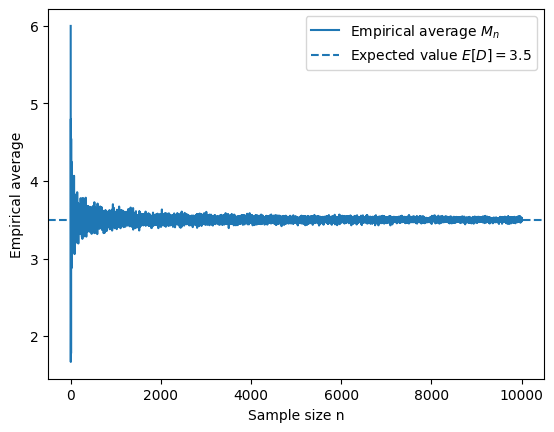

In [23]:
plt.figure()
plt.plot(n, emp_means, label=r'Empirical average $M_n$')
plt.axhline(E_D, linestyle='--', label=r'Expected value $E[D]=3.5$')
plt.xlabel('Sample size n')
plt.ylabel('Empirical average')
plt.legend()
plt.show()

_[when n increases, Mn gets stabilized around 3.5 as noticed in the graph for the expected value line.]_

### (d)

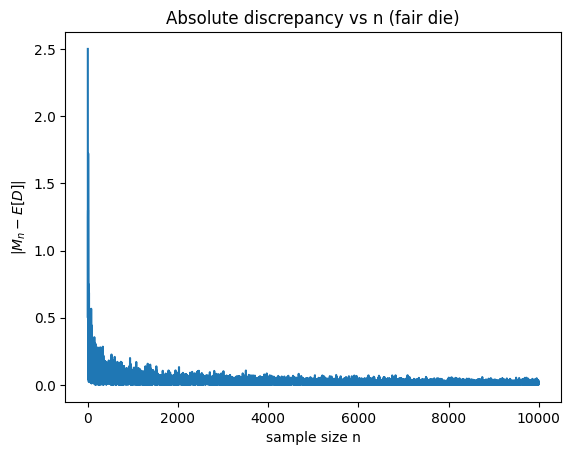

In [24]:
plt.figure()
plt.plot(n, discrepancies)
plt.xlabel('sample size n')
plt.ylabel(r'$|M_n - E[D]|$')
plt.title('Absolute discrepancy vs n (fair die)')
plt.show()

_[So the absolute discrepancy is discreased with larger n which is the natural law of LN.]_

## Problem 2.2

### (a)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

values = np.array([1,2,3,4,5,6])
probs  = np.array([0.1,0.1,0.1,0.1,0.1,0.5])
n = np.arange(1, 10001)

rng = np.random.default_rng(2)
emp_means_unfair = []
for i in n:
    rolls = rng.choice(values, size=i, p=probs)
    emp_means_unfair.append(rolls.mean())

### (b)

In [26]:
E_D_unfair = (values * probs).sum()
discrepancies_unfair = np.abs(np.array(emp_means_unfair) - E_D_unfair)

### (c)

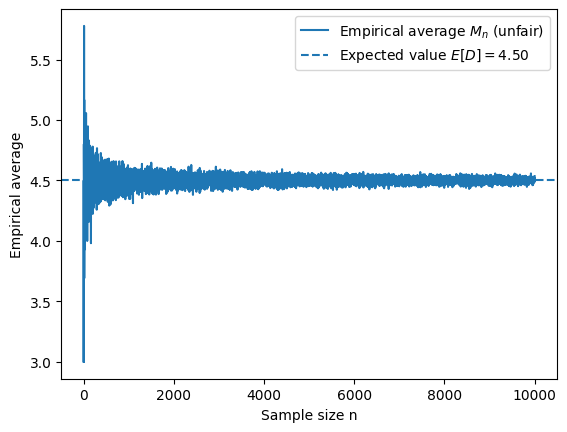

In [27]:
plt.figure()
plt.plot(n, emp_means_unfair, label=r'Empirical average $M_n$ (unfair)')
plt.axhline(E_D_unfair, linestyle='--',
            label=fr'Expected value $E[D]={E_D_unfair:.2f}$')
plt.xlabel('Sample size n')
plt.ylabel('Empirical average')
plt.legend()
plt.show()

_[When n grows, Mn stabalizes at E[D] = 5, which is the convergence of the empirical avergages for the biased die's epected value.]_

### (d)

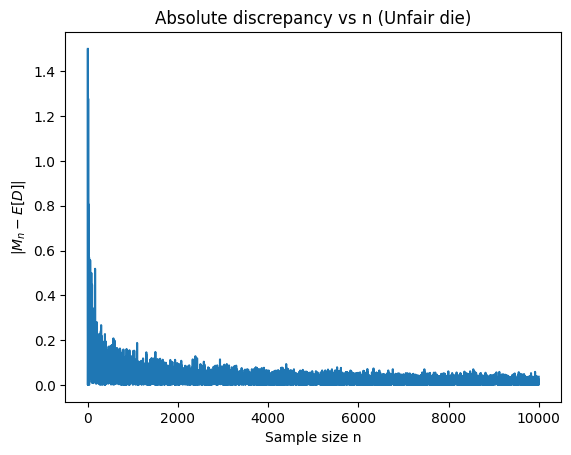

In [28]:
plt.figure()
plt.plot(n, discrepancies_unfair)
plt.xlabel('Sample size n')
plt.ylabel(r'$|M_n - E[D]|$')
plt.title('Absolute discrepancy vs n (Unfair die)')
plt.show()

_[At the lest side of the graph, the bar starts off tall and then the average can move fown, and then sometimes far from the true expected value of 5.0. As sample size n increases, the cuve drops near zero. So rolling the die more will lead to the closer average reulst of 5.0.]_